In [0]:
!rm abalone.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

--2019-03-02 15:56:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191873 (187K) [text/plain]
Saving to: ‘abalone.data’

abalone.data        100%[===================>] 187.38K   477KB/s    in 0.4s    

2019-03-02 15:56:46 (477 KB/s) - ‘abalone.data’ saved [191873/191873]



In [0]:
!rm abalone.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names

--2019-03-02 15:56:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4319 (4.2K) [text/plain]
Saving to: ‘abalone.names’

abalone.names       100%[===================>]   4.22K  --.-KB/s    in 0s      

2019-03-02 15:56:50 (90.5 MB/s) - ‘abalone.names’ saved [4319/4319]



In [0]:
import pandas as pd
df = pd.read_csv("abalone.data",header=None,names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])


In [0]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Class 0: If the number of rings is smaller than or equal than 11

> Indented block



Class 1: If the number of rings is larger than 11

rings + 1.5 gives age

In [0]:
feature_columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']

X = df[feature_columns].values
y = df['Rings'].values

In [0]:
for data in X:
  if data[0] == "M":
    data[0] = 1
  else:
    data[0] = 0

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.117102 to fit



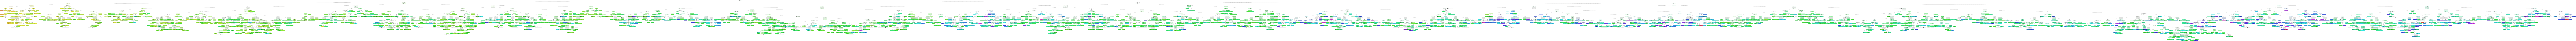

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X,y)
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [0]:
from sklearn.model_selection import train_test_split
feature_train,feature_test,label_train,label_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [0]:
feature_test

array([[1, 0.43, 0.33, ..., 0.1315, 0.085, 0.11199999999999999],
       [0, 0.485, 0.375, ..., 0.1925, 0.1315, 0.1685],
       [0, 0.71, 0.55, ..., 0.743, 0.345, 0.45],
       ...,
       [1, 0.625, 0.505, ..., 0.496, 0.287, 0.435],
       [0, 0.385, 0.3, ..., 0.1525, 0.055999999999999994, 0.0835],
       [0, 0.585, 0.475, ..., 0.48, 0.23399999999999999, 0.285]],
      dtype=object)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(algorithm="kd_tree",n_jobs=-1,n_neighbors=60,leaf_size=20,weights="distance")
neigh.fit(feature_train,label_train)
a = neigh.predict(feature_test)

In [0]:
type(a)

numpy.ndarray

In [0]:
b =[]
for ag in a:
  b.append(ag+1.5)
print(b)

[10.5, 10.5, 12.5, 10.5, 12.5, 12.5, 8.5, 11.5, 8.5, 13.5, 11.5, 10.5, 10.5, 8.5, 10.5, 11.5, 9.5, 8.5, 11.5, 12.5, 10.5, 9.5, 10.5, 10.5, 12.5, 9.5, 10.5, 10.5, 11.5, 13.5, 10.5, 11.5, 9.5, 6.5, 12.5, 11.5, 10.5, 10.5, 11.5, 9.5, 9.5, 10.5, 11.5, 10.5, 7.5, 9.5, 12.5, 8.5, 10.5, 11.5, 11.5, 8.5, 12.5, 8.5, 11.5, 8.5, 11.5, 10.5, 12.5, 11.5, 11.5, 12.5, 10.5, 14.5, 5.5, 10.5, 11.5, 12.5, 8.5, 8.5, 7.5, 8.5, 12.5, 11.5, 7.5, 7.5, 12.5, 9.5, 9.5, 8.5, 6.5, 9.5, 9.5, 10.5, 11.5, 9.5, 10.5, 12.5, 10.5, 12.5, 10.5, 10.5, 11.5, 10.5, 14.5, 5.5, 9.5, 8.5, 9.5, 9.5, 11.5, 10.5, 12.5, 10.5, 8.5, 12.5, 8.5, 9.5, 12.5, 11.5, 7.5, 10.5, 9.5, 11.5, 11.5, 8.5, 11.5, 8.5, 11.5, 5.5, 12.5, 8.5, 12.5, 12.5, 10.5, 8.5, 11.5, 11.5, 12.5, 8.5, 10.5, 10.5, 8.5, 12.5, 13.5, 8.5, 9.5, 11.5, 11.5, 10.5, 9.5, 6.5, 12.5, 9.5, 10.5, 9.5, 13.5, 8.5, 12.5, 9.5, 10.5, 9.5, 7.5, 12.5, 10.5, 10.5, 11.5, 9.5, 9.5, 10.5, 8.5, 8.5, 10.5, 10.5, 11.5, 8.5, 12.5, 10.5, 11.5, 8.5, 10.5, 10.5, 9.5, 10.5, 8.5, 9.5, 7.5, 7.5, 

In [0]:
print("Accuracy is ",neigh.score(feature_test,label_test))

Accuracy is  0.24641148325358853


In [0]:
df1 = pd.read_csv("abalone.data",header=None,names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'],)


In [0]:
df1.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [0]:
df2 = pd.DataFrame(feature_test,columns=feature_columns)

In [0]:
df2.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1,0.43,0.33,0.095,0.34,0.1315,0.085,0.112
1,0,0.485,0.375,0.135,0.556,0.1925,0.1315,0.1685
2,0,0.71,0.55,0.17,1.614,0.743,0.345,0.45
3,0,0.52,0.4,0.12,0.6515,0.261,0.2015,0.165
4,0,0.685,0.54,0.215,1.7025,0.664,0.3655,0.4735


In [0]:
df2['Rings'] = a
#df2.drop('Age', axis=1)

In [0]:
b =[]
for ag in a:
  b.append(ag+1.5)
print(b)

[10.5, 10.5, 12.5, 10.5, 12.5, 12.5, 8.5, 11.5, 8.5, 13.5, 11.5, 10.5, 10.5, 8.5, 10.5, 11.5, 9.5, 8.5, 11.5, 12.5, 10.5, 9.5, 10.5, 10.5, 12.5, 9.5, 10.5, 10.5, 11.5, 13.5, 10.5, 11.5, 9.5, 6.5, 12.5, 11.5, 10.5, 10.5, 11.5, 9.5, 9.5, 10.5, 11.5, 10.5, 7.5, 9.5, 12.5, 8.5, 10.5, 11.5, 11.5, 8.5, 12.5, 8.5, 11.5, 8.5, 11.5, 10.5, 12.5, 11.5, 11.5, 12.5, 10.5, 14.5, 5.5, 10.5, 11.5, 12.5, 8.5, 8.5, 7.5, 8.5, 12.5, 11.5, 7.5, 7.5, 12.5, 9.5, 9.5, 8.5, 6.5, 9.5, 9.5, 10.5, 11.5, 9.5, 10.5, 12.5, 10.5, 12.5, 10.5, 10.5, 11.5, 10.5, 14.5, 5.5, 9.5, 8.5, 9.5, 9.5, 11.5, 10.5, 12.5, 10.5, 8.5, 12.5, 8.5, 9.5, 12.5, 11.5, 7.5, 10.5, 9.5, 11.5, 11.5, 8.5, 11.5, 8.5, 11.5, 5.5, 12.5, 8.5, 12.5, 12.5, 10.5, 8.5, 11.5, 11.5, 12.5, 8.5, 10.5, 10.5, 8.5, 12.5, 13.5, 8.5, 9.5, 11.5, 11.5, 10.5, 9.5, 6.5, 12.5, 9.5, 10.5, 9.5, 13.5, 8.5, 12.5, 9.5, 10.5, 9.5, 7.5, 12.5, 10.5, 10.5, 11.5, 9.5, 9.5, 10.5, 8.5, 8.5, 10.5, 10.5, 11.5, 8.5, 12.5, 10.5, 11.5, 8.5, 10.5, 10.5, 9.5, 10.5, 8.5, 9.5, 7.5, 7.5, 

In [0]:
#df2 = df2.drop('Age', axis=1)

In [0]:
#df2['Age'] = b
df2.insert(9,"Age",b)

In [0]:
df2.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,1,0.43,0.33,0.095,0.34,0.1315,0.085,0.112,9,10.5
1,0,0.485,0.375,0.135,0.556,0.1925,0.1315,0.1685,9,10.5
2,0,0.71,0.55,0.17,1.614,0.743,0.345,0.45,11,12.5
3,0,0.52,0.4,0.12,0.6515,0.261,0.2015,0.165,9,10.5
4,0,0.685,0.54,0.215,1.7025,0.664,0.3655,0.4735,11,12.5
